### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
# Obtenção do faturamento total de cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

In [ ]:
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
faturamentos

[np.float64(1534509.12),
 np.float64(1488459.06),
 np.float64(1464025.03),
 np.float64(1384497.58)]

# 2. Vendas por Categoria

In [ ]:
venda_categoria1 = loja.groupby('Categoria do Produto')['Preço'].sum()
venda_categoria2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
venda_categoria3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
venda_categoria4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

In [ ]:
# Identificação das categorias
view_categorias = loja['Categoria do Produto'].unique()
view_categorias

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

In [ ]:
# Transformar as categorias em Dataframe
df_categorias = pd.DataFrame({'categorias': ['brinquedos', 'eletrodomesticos','eletronicos','esporte e lazer','instrumentos musicais','livros','moveis','utilidades domesticas']})
df_categorias

,categorias
0,brinquedos
1,eletrodomesticos
2,eletronicos
3,esporte e lazer
4,instrumentos musicais
5,livros
6,moveis
7,utilidades domesticas


In [ ]:
# Variáveis de filtro negativo
semEletronicos = ['moveis',
                  'brinquedos',
                  'eletrodomesticos',
                  'utilidades domesticas',
                  'esporte e lazer',
                  'livros',
                  'instrumentos musicais']

semMoveis =  ['eletronicos',
              'brinquedos',
              'eletrodomesticos',
              'utilidades domesticas',
              'esporte e lazer',
              'livros',
              'instrumentos musicais']

semBrinquedos = ['eletronicos',
                  'moveis',
                  'eletrodomesticos',
                  'utilidades domesticas',
                  'esporte e lazer',
                  'livros',
                  'instrumentos musicais']

semEletrodomesticos = ['eletronicos',
                        'moveis',
                        'brinquedos',
                        'utilidades domesticas',
                        'esporte e lazer',
                        'livros',
                        'instrumentos musicais']

sem_util_dom = ['eletronicos',
                'moveis',
                'brinquedos',
                'eletrodomesticos',
                'esporte e lazer',
                'livros',
                'instrumentos musicais']

sem_esp_lazer = ['eletronicos',
                  'moveis',
                  'brinquedos',
                  'eletrodomesticos',
                  'utilidades domesticas',
                  'livros',
                  'instrumentos musicais']

sem_livros = ['eletronicos',
              'moveis',
              'brinquedos',
              'eletrodomesticos',
              'utilidades domesticas',
              'esporte e lazer',
              'instrumentos musicais']

sem_inst_musicais = ['eletronicos',
                      'moveis',
                      'brinquedos',
                      'eletrodomesticos',
                      'utilidades domesticas',
                      'esporte e lazer',
                      'livros']

In [ ]:
# Obtenção da quantidade de vendas por categoria da loja 1
eletronicos = len(loja.query('`Categoria do Produto` not in @semEletronicos'))
moveis = len(loja.query('`Categoria do Produto` not in @semMoveis'))
brinquedos = len(loja.query('`Categoria do Produto` not in @semBrinquedos'))
eletrodomesticos = len(loja.query('`Categoria do Produto` not in @semEletrodomesticos'))
utilidades_domesticas = len(loja.query('`Categoria do Produto` not in @sem_util_dom'))
esporte_lazeres = len(loja.query('`Categoria do Produto` not in @sem_esp_lazer'))
livros = len(loja.query('`Categoria do Produto` not in @sem_livros'))
inst_musicais = len(loja.query('`Categoria do Produto` not in @sem_inst_musicais'))

In [ ]:
# Obtenção da quantidade de vendas por categoria da loja 2
eletronicos2 = len(loja2.query('`Categoria do Produto` not in @semEletronicos'))
moveis2 = len(loja2.query('`Categoria do Produto` not in @semMoveis'))
brinquedos2 = len(loja2.query('`Categoria do Produto` not in @semBrinquedos'))
eletrodomesticos2 = len(loja2.query('`Categoria do Produto` not in @semEletrodomesticos'))
utilidades_domesticas2 = len(loja2.query('`Categoria do Produto` not in @sem_util_dom'))
esporte_lazeres2 = len(loja2.query('`Categoria do Produto` not in @sem_esp_lazer'))
livros2 = len(loja2.query('`Categoria do Produto` not in @sem_livros'))
inst_musicais2 = len(loja2.query('`Categoria do Produto` not in @sem_inst_musicais'))

In [ ]:
# Obtenção da quantidade de vendas por categoria da loja 3
eletronicos3 = len(loja3.query('`Categoria do Produto` not in @semEletronicos'))
moveis3 = len(loja3.query('`Categoria do Produto` not in @semMoveis'))
brinquedos3 = len(loja3.query('`Categoria do Produto` not in @semBrinquedos'))
eletrodomesticos3 = len(loja3.query('`Categoria do Produto` not in @semEletrodomesticos'))
utilidades_domesticas3 = len(loja3.query('`Categoria do Produto` not in @sem_util_dom'))
esporte_lazeres3 = len(loja3.query('`Categoria do Produto` not in @sem_esp_lazer'))
livros3 = len(loja3.query('`Categoria do Produto` not in @sem_livros'))
inst_musicais3 = len(loja3.query('`Categoria do Produto` not in @sem_inst_musicais'))

In [ ]:
# Obtenção da quantidade de vendas por categoria da loja 4
eletronicos4 = len(loja4.query('`Categoria do Produto` not in @semEletronicos'))
moveis4 = len(loja4.query('`Categoria do Produto` not in @semMoveis'))
brinquedos4 = len(loja4.query('`Categoria do Produto` not in @semBrinquedos'))
eletrodomesticos4 = len(loja4.query('`Categoria do Produto` not in @semEletrodomesticos'))
utilidades_domesticas4 = len(loja4.query('`Categoria do Produto` not in @sem_util_dom'))
esporte_lazeres4 = len(loja4.query('`Categoria do Produto` not in @sem_esp_lazer'))
livros4 = len(loja4.query('`Categoria do Produto` not in @sem_livros'))
inst_musicais4 = len(loja4.query('`Categoria do Produto` not in @sem_inst_musicais'))

In [ ]:
# Concatenação das quantidades de venda por categoria
categorias = [brinquedos, eletrodomesticos, eletronicos, esporte_lazeres, inst_musicais, livros, moveis, utilidades_domesticas]
categorias2 = [brinquedos2, eletrodomesticos2, eletronicos2, esporte_lazeres2, inst_musicais2, livros2, moveis2, utilidades_domesticas2]
categorias3 = [brinquedos3, eletrodomesticos3, eletronicos3, esporte_lazeres3, inst_musicais3, livros3, moveis3, utilidades_domesticas3]
categorias4 = [brinquedos4, eletrodomesticos4, eletronicos4, esporte_lazeres4, inst_musicais4, livros4, moveis4, utilidades_domesticas4]

In [ ]:
# Concatenação de quantidade e venda por loja
df_vendas_loja1 = pd.DataFrame({'vendas1': [venda_categoria1[0],venda_categoria1[1],venda_categoria1[2],venda_categoria1[3],venda_categoria1[4],venda_categoria1[5],venda_categoria1[6],venda_categoria1[7]]})
df_qtd_loja1 = pd.DataFrame({'quantidades1': [categorias[0],categorias[1],categorias[2],categorias[3],categorias[4],categorias[5],categorias[6],categorias[7]]})

df_vendas_loja2 = pd.DataFrame({'vendas2': [venda_categoria2[0],venda_categoria2[1],venda_categoria2[2],venda_categoria2[3],venda_categoria2[4],venda_categoria2[5],venda_categoria2[6],venda_categoria2[7]]})
df_qtd_loja2 = pd.DataFrame({'quantidades2': [categorias2[0],categorias2[1],categorias2[2],categorias2[3],categorias2[4],categorias2[5],categorias2[6],categorias2[7]]})

df_vendas_loja3 = pd.DataFrame({'vendas3': [venda_categoria3[0],venda_categoria3[1],venda_categoria3[2],venda_categoria3[3],venda_categoria3[4],venda_categoria3[5],venda_categoria3[6],venda_categoria3[7]]})
df_qtd_loja3 = pd.DataFrame({'quantidades3': [categorias3[0],categorias3[1],categorias3[2],categorias3[3],categorias3[4],categorias3[5],categorias3[6],categorias3[7]]})

df_vendas_loja4 = pd.DataFrame({'vendas4': [venda_categoria4[0],venda_categoria4[1],venda_categoria4[2],venda_categoria4[3],venda_categoria4[4],venda_categoria4[5],venda_categoria4[6],venda_categoria4[7]]})
df_qtd_loja4 = pd.DataFrame({'quantidades4': [categorias4[0],categorias4[1],categorias4[2],categorias4[3],categorias4[4],categorias4[5],categorias4[6],categorias4[7]]})

df_sell_qtd = pd.concat([df_categorias ,df_vendas_loja1,df_vendas_loja2,df_vendas_loja3,df_vendas_loja4,df_qtd_loja1,df_qtd_loja2,df_qtd_loja3,df_qtd_loja4], axis=1)
df_sell_qtd

/tmp/ipython-input-1496400871.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_vendas_loja1 = pd.DataFrame({'vendas1': [venda_categoria1[0],venda_categoria1[1],venda_categoria1[2],venda_categoria1[3],venda_categoria1[4],venda_categoria1[5],venda_categoria1[6],venda_categoria1[7]]})
/tmp/ipython-input-1496400871.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_vendas_loja2 = pd.DataFrame({'vendas2': [venda_categoria2[0],venda_categoria2[1],venda_categoria2[2],venda_categoria2[3],venda_categoria2[4],venda_categoria2[5],venda_categoria2[6],venda_categoria2[7]]})
/tmp/ipython-input-1496400871.py:8: FutureWarn

,categorias,vendas1,vendas2,vendas3,vendas4,quantidades1,quantidades2,quantidades3,quantidades4
0,brinquedos,23993.78,21262.21,25869.20,27015.67,324,313,315,338
1,eletrodomesticos,484913.36,464758.13,438984.89,377680.65,312,305,278,254
2,eletronicos,572659.23,547773.71,547699.92,545966.86,448,422,451,451
3,esporte e lazer,52387.55,46326.09,47456.10,44465.65,284,275,277,277
4,instrumentos musicais,121731.69,139987.03,103174.45,100136.50,182,224,177,170
5,livros,11713.92,13454.35,12664.70,12427.77,173,197,185,187
6,moveis,250178.11,235234.68,268095.56,256705.65,465,442,499,480
7,utilidades domesticas,16931.48,19662.86,20080.21,20098.83,171,181,177,201


In [ ]:
# Total de vendas por loja
qtd_vendas_lj = [df_sell_qtd['quantidades1'].sum(), df_sell_qtd['quantidades2'].sum(), df_sell_qtd['quantidades3'].sum(), df_sell_qtd['quantidades4'].sum()]
qtd_vendas_lj

[np.int64(2359), np.int64(2359), np.int64(2359), np.int64(2358)]

# 3. Média de Avaliação das Lojas


In [ ]:
media = loja['Avaliação da compra'].mean()
media2 = loja2['Avaliação da compra'].mean()
media3 = loja3['Avaliação da compra'].mean()
media4 = loja4['Avaliação da compra'].mean()

In [ ]:
medias = [media, media2, media3, media4]
medias

[np.float64(3.976685036032217),
 np.float64(4.037303942348453),
 np.float64(4.048325561678677),
 np.float64(3.9957591178965224)]

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Identificação dos produtos

produtos = pd.DataFrame(loja['Produto'].unique())
produtos2 = pd.DataFrame(loja2['Produto'].unique())
produtos3 = pd.DataFrame(loja3['Produto'].unique())
produtos4 = pd.DataFrame(loja4['Produto'].unique())

len(produtos)
len(produtos2)
len(produtos3)
len(produtos4)
# Cada loja vende 51 produtos diferentes

todos_produtos = pd.concat([produtos, produtos2, produtos3, produtos4], axis=0)
len(todos_produtos[0].unique())
# Todas as lojas vendem exatamente os mesmos produtos

51

In [ ]:
#Filtro dos 5 produtos mais vendidos e dos 5 produtos menos vendidos menos vendidos por loja

# Filtro loja 1
qtd_produtos = loja['Produto'].value_counts(normalize=True)
p_mais_vendidos = qtd_produtos.head().reset_index()
p_mais_vendidos.columns = ['Produto', 'Proporção']
p_menos_vendidos = qtd_produtos.tail().reset_index()
p_menos_vendidos.columns = ['Produto', 'Proporção']
p_menos_vendidos = p_menos_vendidos.sort_values(ascending=True, by='Proporção')

# Filtro loja 2
qtd_produtos2 = loja2['Produto'].value_counts(normalize=True)
p_mais_vendidos2 = qtd_produtos2.head().reset_index()
p_mais_vendidos2.columns = ['Produto', 'Proporção']
p_menos_vendidos2 = qtd_produtos2.tail().reset_index()
p_menos_vendidos2.columns = ['Produto', 'Proporção']
p_menos_vendidos2 = p_menos_vendidos2.sort_values(ascending=True, by='Proporção')

# Filtro loja 3
qtd_produtos3 = loja3['Produto'].value_counts(normalize=True)
p_mais_vendidos3 = qtd_produtos3.head().reset_index()
p_mais_vendidos3.columns = ['Produto', 'Proporção']
p_menos_vendidos3 = qtd_produtos3.tail().reset_index()
p_menos_vendidos3.columns = ['Produto', 'Proporção']
p_menos_vendidos3 = p_menos_vendidos3.sort_values(ascending=True, by='Proporção')

# Filtro loja 4
qtd_produtos4 = loja4['Produto'].value_counts(normalize=True)
p_mais_vendidos4 = qtd_produtos4.head().reset_index()
p_mais_vendidos4.columns = ['Produto', 'Proporção']
p_menos_vendidos4 = qtd_produtos4.tail().reset_index()
p_menos_vendidos4.columns = ['Produto', 'Proporção']
p_menos_vendidos4 = p_menos_vendidos4.sort_values(ascending=True, by='Proporção')

In [ ]:
# Exibição dos ranqueamentos de quantidade de venda dos produtos por loja no formato de lista. OBS: não foi especificado como os resultados deveriam ser apresentados no challange
best_prod = p_mais_vendidos['Produto'].tolist()
worse_prod = p_menos_vendidos['Produto'].tolist()

best_prod2 = p_mais_vendidos2['Produto'].tolist()
worse_prod2 = p_menos_vendidos2['Produto'].tolist()

best_prod3 = p_mais_vendidos3['Produto'].tolist()
worse_prod3 = p_menos_vendidos3['Produto'].tolist()

best_prod4 = p_mais_vendidos4['Produto'].tolist()
worse_prod4 = p_menos_vendidos4['Produto'].tolist()

print(f'Produtos mais vendidos da loja 1: {best_prod}\nProdutos menos vendidos da loja 1: {worse_prod}\n')
print(f'Produtos mais vendidos da loja 2: {best_prod2}\nProdutos menos vendidos da loja 2: {worse_prod2}\n')
print(f'Produtos mais vendidos da loja 3: {best_prod3}\nProdutos menos vendidos da loja 3: {worse_prod3}\n')
print(f'Produtos mais vendidos da loja 4: {best_prod4}\nProdutos menos vendidos da loja 4: {worse_prod4}')

Produtos mais vendidos da loja 1: ['Micro-ondas', 'TV Led UHD 4K', 'Guarda roupas', 'Secadora de roupas', 'Cômoda']
Produtos menos vendidos da loja 1: ['Headset', 'Celular ABXY', 'Panela de pressão', 'Pandeiro', 'Ciência de dados com python']

Produtos mais vendidos da loja 2: ['Iniciando em programação', 'Micro-ondas', 'Bateria', 'Violão', 'Pandeiro']
Produtos menos vendidos da loja 2: ['Jogo de tabuleiro', 'Impressora', 'Mesa de jantar', 'Poltrona', 'Fone de ouvido']

Produtos mais vendidos da loja 3: ['Kit banquetas', 'Mesa de jantar', 'Cama king', 'Jogo de panelas', 'Cômoda']
Produtos menos vendidos da loja 3: ['Blocos de montar', 'Jogo de copos', 'Micro-ondas', 'Mochila', 'Guitarra']

Produtos mais vendidos da loja 4: ['Cama box', 'Faqueiro', 'Dashboards com Power BI', 'Cama king', 'Carrinho controle remoto']
Produtos menos vendidos da loja 4: ['Guitarra', 'Guarda roupas', 'Violão', 'Ciência de dados com python', 'Geladeira']


# 5. Frete Médio por Loja

In [ ]:
# Frete médio da loja 1
media_frete_lj1 = loja['Frete'].mean()
media_frete_lj1

np.float64(34.69180491551149)

In [ ]:
# Frete médio da loja 2
media_frete_lj2 = loja2['Frete'].mean()
media_frete_lj2

np.float64(33.62194065817927)

In [ ]:
# Frete médio da loja 3
media_frete_lj3 = loja3['Frete'].mean()
media_frete_lj3

np.float64(33.07446427411743)

In [ ]:
# Frete médio da loja 4
media_frete_lj4 = loja4['Frete'].mean()
media_frete_lj4

np.float64(31.278997081841727)

# Análise de gráfico

In [ ]:
import matplotlib.pyplot as plt

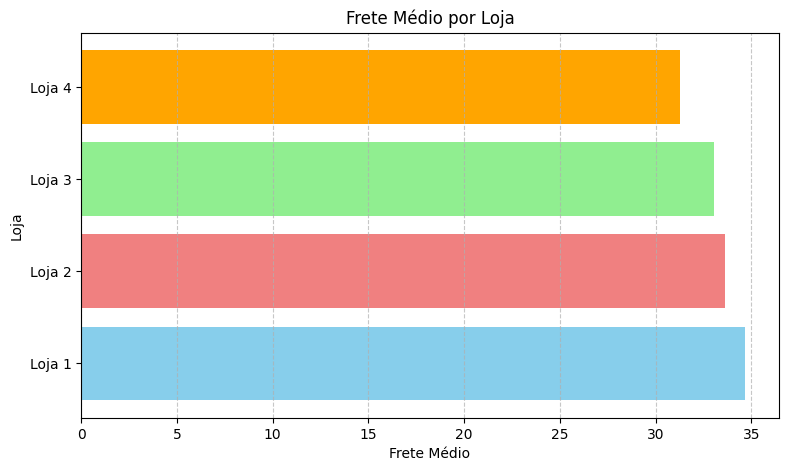

In [ ]:
# Análise do frete médio por loja
df_medias = pd.DataFrame({'Loja 1': [media_frete_lj1],
                          'Loja 2': [media_frete_lj2],
                          'Loja 3': [media_frete_lj3],
                          'Loja 4': [media_frete_lj4]})

lojas = df_medias.columns.tolist()
medias = df_medias.iloc[0].values

plt.figure(figsize=(9, 5))

plt.barh(
  lojas,
  medias,
  color = ['skyblue', 'lightcoral', 'lightgreen', 'orange']
)

plt.title('Frete Médio por Loja')
plt.ylabel('Loja')
plt.xlabel('Frete Médio')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

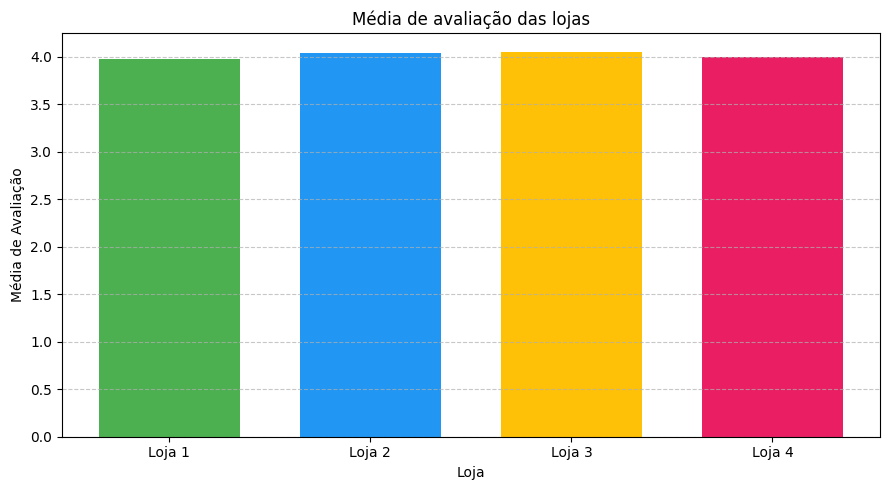

In [ ]:
# Análise da média de avaliação das lojas
media_rating_loja = loja['Avaliação da compra'].mean()
media_rating_loja2 = loja2['Avaliação da compra'].mean()
media_rating_loja3 = loja3['Avaliação da compra'].mean()
media_rating_loja4 = loja4['Avaliação da compra'].mean()

categorias = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = [media_rating_loja, media_rating_loja2, media_rating_loja3, media_rating_loja4]

cores = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']
plt.figure(figsize=(9,5))

plt.bar(
    categorias,
    valores,
    color=cores,
    width=0.7
)


plt.title('Média de avaliação das lojas')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

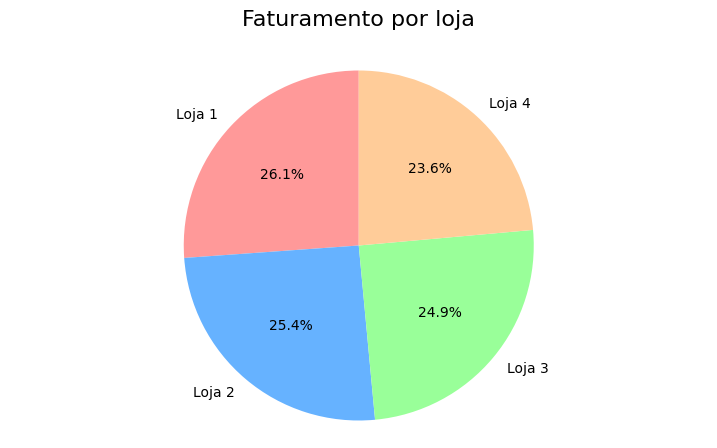

In [ ]:
# Análise dos produtos mais vendidos por loja com base no somatório do total de vendas do produto mais vendido de cada loja. (Total = 1165)

qtds = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Cores personalizadas
cores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(9, 5)) # Define o tamanho da figura para um aspecto quadrado

plt.pie(
    qtds,
    labels=['Loja 1','Loja 2','Loja 3','Loja 4'],
    colors=cores,
    autopct='%1.1f%%',
    startangle=90,
)

plt.axis('equal')


plt.title('Faturamento por loja', fontsize=16, pad=20)

plt.show()